In [1]:
import numpy as np
import torch
import random
from collections import deque
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import datetime
import pickle
import math
import matplotlib.pyplot as plt

In [39]:
class DDQN_Preliminar1_0:
    def __init__(self):
        self.high = 1
        self.low = -1
        self.state_dim = 8
        self.action_dim = 9
        self.name = 'DDQN_Preliminar-v0'
        self.posx = 0
        self.posy = 0
        self.x0 = 0
        self.y0 = 0
        self.z0 = 0
        self.vx0 = 0
        self.vy0 = 0
        self.vz0 = 0
        self.targetx, self.targety = self.calculaTarget()
        self.distancia = self.calculaDistancia()
        self.dt = 1
        self.t = 0
        self.agent = Agent(self.state_dim,self.action_dim)

    def calculaTarget(self):
        tempo_queda = (self.vz0+np.sqrt(self.vz0**2+2*9.8*self.z0))/9.8
        self.targetx = self.x0 + tempo_queda*self.vx0
        self.targety = self.y0 + tempo_queda*self.vy0
        return self.targetx, self.targety

    def calculaDistancia(self):
        self.distancia = np.sqrt((self.posx-self.targetx)**2 + (self.posy-self.targety)**2)
        return self.distancia

    def calculaReward(self):
        return -self.distancia - 0.75
    
    def reset(self):
        self.posx = random.uniform(-1.8,1.8)
        self.posy = random.uniform(-1.8,1.8)
        self.x0 = random.uniform(-1.8,1.8)
        self.y0 = random.uniform(-1.8,1.8)
        self.z0 = random.uniform(1, 1.8)
        self.vx0 = random.uniform(-1.5,1.5)
        self.vy0 = random.uniform(-1.5,1.5)
        self.vz0 = random.uniform(-1.5,1.5)
        self.targetx, self.targety = self.calculaTarget()
        self.t = 0
        return (self.posx, self.posy, self.x0, self.y0, self.z0, self.vx0, self.vy0, self.vz0)

    def step(self, action):
        action = self.agent.take_action(action)
        self.posx += 0.15*action[0]
        self.posy += 0.15*action[1]
        self.distancia = self.calculaDistancia()
        self.t += self.dt
        reward = self.calculaReward()
        if self.distancia < 0.2:
            reward += 50
            done = True
        elif self.t >= 50:
            done = True
        else:
            done = False
        return (self.posx, self.posy, self.x0, self.y0, self.z0, self.vx0, self.vy0, self.vz0), reward, done
    
    
class DDQN_Preliminar2_0:
    def __init__(self):
        self.high = 1
        self.low = -1
        self.state_dim = 10
        self.action_dim = 9
        self.name = 'DDQN_Preliminar2-v0'
        self.theta1 = 0
        self.theta2 = 0
        self.x0 = 0
        self.y0 = 0
        self.z0 = 0
        self.vx0 = 0
        self.vy0 = 0
        self.vz0 = 0
        self.L1 = 1.5
        self.L2 = 1.5
        self.Cx = 0
        self.Cy = 0
        self.posx, self.posy = self.calculaPosicao()
        self.targetx, self.targety = self.calculaTarget()
        self.distancia = self.calculaDistancia()
        self.dt = 1
        self.t = 0
        self.agent = Agent(self.state_dim,self.action_dim)


    def calculaPosicao(self):
        self.posx = self.Cx + self.L1*np.cos(self.theta1) + self.L2*np.cos(self.theta1+self.theta2)
        self.posy = self.Cy + self.L1*np.sin(self.theta1) + self.L2*np.sin(self.theta1+self.theta2)
        return self.posx, self.posy

    def calculaTarget(self):
        tempo_queda = (self.vz0+np.sqrt(self.vz0**2+2*9.8*self.z0))/9.8
        self.targetx = self.x0 + tempo_queda*self.vx0
        self.targety = self.y0 + tempo_queda*self.vy0
        return self.targetx, self.targety

    def calculaDistancia(self):
        self.distancia = np.sqrt((self.posx-self.targetx)**2 + (self.posy-self.targety)**2)
        return self.distancia

    def calculaReward(self):
        return -self.distancia-0.75
    
    def reset(self):
        self.theta1 = random.uniform(-np.pi,np.pi)
        self.theta2 = random.uniform(-np.pi,np.pi)
        self.posx, self.posy = self.calculaPosicao()
        self.x0 = random.uniform(-1.5,1.5)
        self.y0 = random.uniform(-1.5,1.5)
        self.z0 = random.uniform(1, 1.8)
        self.vx0 = random.uniform(-1.5,1.5)
        self.vy0 = random.uniform(-1.5,1.5)
        self.vz0 = random.uniform(-1.5,1.5)
        self.targetx, self.targety = self.calculaTarget()
        self.t = 0
        return (self.posx, self.posy, self.theta1, self.theta2, self.x0, self.y0, self.z0, self.vx0, self.vy0, self.vz0)

    def step(self, action):
        action = self.agent.take_action(action)
        self.theta1 += 0.15*action[0]
        self.theta2 += 0.15*action[1]
        self.posx, self.posy = self.calculaPosicao()
        self.distancia = self.calculaDistancia()
        self.t += self.dt
        reward = self.calculaReward()
        if self.distancia < 0.2:
            reward += 50
            done = True
        elif self.t >= 50:
            done = True
        else:
            done = False
        return (self.posx, self.posy, self.theta1, self.theta2, self.x0, self.y0, self.z0, self.vx0, self.vy0, self.vz0), reward, done

    
class DDQN_Preliminar3_0:
    def __init__(self):
        self.high = 1
        self.low = -1
        self.state_dim = 10
        self.action_dim = 9
        self.name = 'DDQN_Preliminar3-v0'
        self.theta1 = 0
        self.theta2 = 0
        self.omega1 = 0
        self.omega2 = 0
        self.x0 = 0
        self.y0 = 0
        self.z0 = 0
        self.vx0 = 0
        self.vy0 = 0
        self.vz0 = 0
        self.L = 1.5
        self.Cx = 0
        self.Cy = 0
        self.posx, self.posy = self.calculaPosicao()
        self.targetx, self.targety = self.calculaTarget()
        self.distancia = self.calculaDistancia()
        self.dt = 1
        self.t = 0
        self.agent = Agent(self.state_dim,self.action_dim)

    def calculaPosicao(self):
        self.posx = self.Cx + 2*self.L*np.cos(self.theta2)*np.cos(self.theta1)
        self.posy = self.Cy + 2*self.L*np.cos(self.theta2)*np.sin(self.theta1)
        return self.posx, self.posy

    def calculaTarget(self):
        tempo_queda = (self.vz0+np.sqrt(self.vz0**2+2*9.8*self.z0))/9.8
        self.targetx = self.x0 + tempo_queda*self.vx0
        self.targety = self.y0 + tempo_queda*self.vy0
        return self.targetx, self.targety

    def calculaDistancia(self):
        self.distancia = np.sqrt((self.posx-self.targetx)**2 + (self.posy-self.targety)**2)
        return self.distancia

    def calculaReward(self):
        return -self.distancia -0.5
    
    def reset(self):
        self.theta1 = random.uniform(-np.pi,np.pi)
        self.theta2 = random.uniform(0,np.pi/2)
        self.omega1 = 0
        self.omega2 = 0
        self.posx, self.posy = self.calculaPosicao()
        self.x0 = random.uniform(-1.5,1.5)
        self.y0 = random.uniform(-1.5,1.5)
        self.z0 = random.uniform(0, 2)
        self.vx0 = random.uniform(-1.5,1.5)
        self.vy0 = random.uniform(-1.5,1.5)
        self.vz0 = random.uniform(-1.5,1.5)
        self.targetx, self.targety = self.calculaTarget()
        self.t = 0
        return (self.theta1, self.theta2, self.omega1, self.omega2, self.x0, self.y0, self.z0, self.vx0, self.vy0, self.vz0)

    def step(self, action):
        action = self.agent.take_action(action)
        done = False
        self.theta1 += 0.3*action[0]
        self.theta2 += 0.3*action[1]
        self.posx, self.posy = self.calculaPosicao()
        self.distancia = self.calculaDistancia()
        self.t += self.dt
        reward = self.calculaReward()
        reward -= (self.omega1 - 0.3*action[0])**2 + (self.omega2 - 0.3*action[1])**2
        self.omega1, self.omega2 = action[0], action[1]
        if self.theta1 <= -np.pi*19/18 or self.theta1 >= np.pi*19/18:
            reward -= 200
            done = True
        if self.theta2 <= 0 or self.theta2 >= np.pi/2:
            reward -= 200
            done = True
        if self.distancia < 0.2:
            reward += 50
            done = True
        elif self.t >= 50:
            done = True
        return (self.theta1, self.theta2, self.omega1, self.omega2, self.x0, self.y0, self.z0, self.vx0, self.vy0, self.vz0), reward, done
    
class DDQN_Preliminar3_1:
    def __init__(self):
        self.high = 1
        self.low = -1
        self.state_dim = 10
        self.action_dim = 9
        self.name = 'DDQN_Preliminar3-v1'
        self.theta1 = 0
        self.theta2 = 0
        self.omega1 = 0
        self.omega2 = 0
        self.x0 = 0
        self.y0 = 0
        self.z0 = 0
        self.vx0 = 0
        self.vy0 = 0
        self.vz0 = 0
        self.L = 1.5
        self.Cx = 0
        self.Cy = 0
        self.posx, self.posy = self.calculaPosicao()
        self.targetx, self.targety = self.calculaTarget()
        self.distancia = self.calculaDistancia()
        self.dt = 1
        self.t = 0
        self.agent = Agent(self.state_dim,self.action_dim)

    def calculaPosicao(self):
        self.posx = self.Cx + 2*self.L*np.cos(self.theta2)*np.cos(self.theta1)
        self.posy = self.Cy + 2*self.L*np.cos(self.theta2)*np.sin(self.theta1)
        return self.posx, self.posy

    def calculaTarget(self):
        tempo_queda = (self.vz0+np.sqrt(self.vz0**2+2*9.8*self.z0))/9.8
        self.targetx = self.x0 + tempo_queda*self.vx0
        self.targety = self.y0 + tempo_queda*self.vy0
        return self.targetx, self.targety

    def calculaDistancia(self):
        self.distancia = np.sqrt((self.posx-self.targetx)**2 + (self.posy-self.targety)**2)
        return self.distancia

    def calculaReward(self):
        return -self.distancia -0.75
    
    def reset(self):
        self.theta1 = random.uniform(-np.pi,np.pi)
        self.theta2 = random.uniform(0,np.pi/2)
        self.omega1 = 0
        self.omega2 = 0
        self.posx, self.posy = self.calculaPosicao()
        self.x0 = random.uniform(-1.5,1.5)
        self.y0 = random.uniform(-1.5,1.5)
        self.z0 = random.uniform(0, 2)
        self.vx0 = random.uniform(-1.5,1.5)
        self.vy0 = random.uniform(-1.5,1.5)
        self.vz0 = random.uniform(-1.5,1.5)
        self.targetx, self.targety = self.calculaTarget()
        self.t = 0
        return (self.theta1, self.theta2, self.omega1, self.omega2, self.x0, self.y0, self.z0, self.vx0, self.vy0, self.vz0)

    def step(self, action):
        action = self.agent.take_action(action)
        done = False
        self.theta1 += 0.15*action[0]
        self.theta2 += 0.15*action[1]
        self.posx, self.posy = self.calculaPosicao()
        self.distancia = self.calculaDistancia()
        self.t += self.dt
        reward = self.calculaReward()
        reward -= (self.omega1 - 0.15*action[0])**2 + (self.omega2 - 0.15*action[1])**2
        self.omega1, self.omega2 = 0.15*action[0], 0.15*action[1]
        if self.theta1 <= -np.pi*19/18 or self.theta1 >= np.pi*19/18:
            reward -= 200
            done = True
        if self.theta2 <= 0 or self.theta2 >= np.pi/2:
            reward -= 200
            done = True
        if self.distancia < 0.05:
            reward += 100
            done = True
        elif self.t >= 50:
            done = True
        return (self.theta1, self.theta2, self.omega1, self.omega2, self.x0, self.y0, self.z0, self.vx0, self.vy0, self.vz0), reward, done


In [40]:
def plot_learning_curve(x, scores, figure_file):
    running_avg_score = np.zeros(len(scores))
    for i in range(len(running_avg_score)):
        running_avg_score[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg_score, '-b')
    plt.title('Média móvel das últimas 100 pontuações')
    plt.savefig(figure_file)

def plot_success_curve(x, successes, figure_file):
    running_success_rate = np.zeros(len(successes))
    for i in range(len(running_success_rate)):
        running_success_rate[i] = np.mean(successes[max(0, i-50):(i+1)])
    plt.plot(x, running_success_rate, '-g')
    plt.title('Taxa de sucesso dos últimos 50 episódios')
    plt.savefig(figure_file)

def plot_step_curve(x, steps, figure_file):
    running_step_avg = np.zeros(len(steps))
    for i in range(len(running_step_avg)):
        running_step_avg[i] = np.mean(steps[max(0, i-200):(i+1)])
    plt.plot(x, running_step_avg, '-g')
    plt.title('Média móvel da duração dos últimos 200 episódios')
    plt.savefig(figure_file)

eps: 0.4995
game: 0
steps 35
reward: -271.34178525683177
max reward: -271.34178525683177 at game 0
average score for the last 100 games: -271.34178525683177
time: 0.016718 seconds

eps: 0.4990005
game: 1
steps 1
reward: -202.62641242209216
max reward: -202.62641242209216 at game 1
average score for the last 100 games: -236.98409883946198
time: 4.7e-05 seconds

eps: 0.4985014995
game: 2
steps 50
reward: -65.80243491668074
max reward: -65.80243491668074 at game 2
average score for the last 100 games: -179.92354419853487
time: 0.043494 seconds

eps: 0.4980029980005
game: 3
steps 50
reward: -91.2961813712978
max reward: -65.80243491668074 at game 2
average score for the last 100 games: -157.76670349172562
time: 0.063949 seconds

eps: 0.4975049950024995
game: 4
steps 50
reward: -71.50700539184622
max reward: -65.80243491668074 at game 2
average score for the last 100 games: -140.51476387174972
time: 0.07639 seconds

eps: 0.497007490007497
game: 5
steps 50
reward: -247.74596920184848
max rew

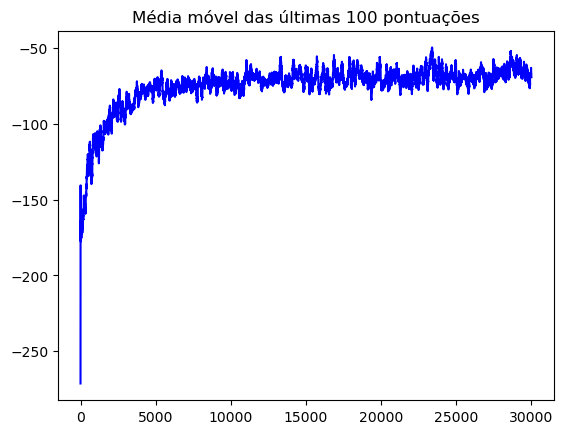

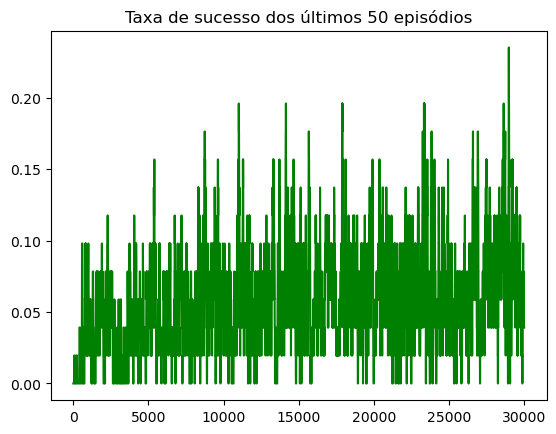

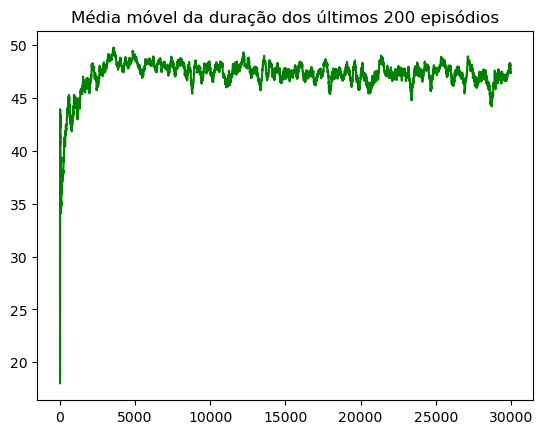

In [41]:
MODEL_FILE = "./ddqn_model"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
N_GAMES = 30000
MEM_SIZE = 100000
BATCH_SIZE = 64
TARGET_UPDATE = 4
GAMMA = 0.99
TAU = 0.005
LR = 1e-4

steps_taken = 0

class ExperienceReplay:
    def __init__(self, buffer_size):
        self.buffer = deque(maxlen=buffer_size)

    def __len__(self):
        return len(self.buffer)

    # Add a transition to the memory by basic SARNS convention. 
    def store_transition(self, state, action, reward, new_state, done):
        # If buffer is abuot to overflow, begin rewriting existing memory? 
        self.buffer.append((state, action, reward, new_state, done))

    # Sample only the memory that has been stored. Samples BATCH
    # amount of samples. 
    def sample(self):
        sample = random.sample(self.buffer, BATCH_SIZE)
        states, actions, rewards, next_states, dones = zip(*sample)
        #print ("actions",actions)
        states = torch.tensor(states).float().to(DEVICE)
        actions = torch.stack(actions).long().to(DEVICE)
        rewards = torch.from_numpy(np.array(rewards, dtype=np.float32).reshape(-1, 1)).to(DEVICE)
        next_states = torch.tensor(next_states).float().to(DEVICE)
        dones = torch.from_numpy(np.array(dones, dtype=np.uint8).reshape(-1, 1)).float().to(DEVICE)
        return (states, actions, rewards, next_states, dones)

class QNetwork(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(QNetwork, self).__init__()
        # Make a simple 3 later linear network
        self.l1 = nn.Linear(state_dim, 128)
        self.l2 = nn.Linear(128, 256)
        self.l3 = nn.Linear(256, action_dim)
        #self.max_action = max_action

    def forward(self, state):
        x = F.relu(self.l1(state))
        x = F.relu(self.l2(x))
        #x = self.max_action * torch.tanh(self.l3(x))
        return self.l3(x)

class Agent():
    # Initialize the agent
    def __init__(self, state_dim, action_dim):
        self.memory = ExperienceReplay(MEM_SIZE)
        self.action_dim = action_dim
        self.main_model = QNetwork(state_dim, action_dim).to(DEVICE)
        self.target_model = QNetwork(state_dim, action_dim).to(DEVICE)
        self.optimizer = optim.Adam(self.main_model.parameters(), lr=LR)
        self.eps = 1
        self.eps_decay = 0.999
        self.eps_min = 0.01

        # Target model will be a copy of the main model and will not be trained
        self.target_model.load_state_dict(self.main_model.state_dict())
        self.target_model.eval()

    # Agent saves its experiences and learn
    def step(self, state, action, reward, new_state, done):
        # Stores the transition into Experience Replay
        self.memory.store_transition(state, action, reward, new_state, done)

        # Agent will only learn when there are enough experiences
        if len(self.memory) > BATCH_SIZE:
            self.learn()

    # Agent learns
    def learn(self):
        # Sample random minibatch of transitions from Experience Replay
        state, action, reward, new_state, done = self.memory.sample()
        #print("state",state,len(state),"\n action",action,len(action))
      
        #print ("target",self.main_model(state))
        # Computes Q(s_{curr},a') then chooses columns of actions that were taken for each batch
        q_eval = self.main_model(state).gather(1,action.unsqueeze(1))
        #print("a",self.main_model(state)[1],action[1],q_eval[1])

        # Clone the model and use it to generate Q learning targets for the main model
        # Also predicts the max Q value for the next state
        #print ("target",self.main_model(state))
        q_next = self.target_model(new_state).detach().max(1)[0].unsqueeze(1)
        #print("b",self.target_model(new_state)[1],q_next[1])

        # Q learning targets = r if next state is terminal or
        # Q learning targets = r + GAMMA*(Q(s_{next},a')) if next state is not terminal
        q_target = reward + GAMMA*(q_next) *(1-done)

        # Compute MSE loss
        loss = F.mse_loss(q_eval, q_target)

        # Stochastic gradient descent on the loss function and does backpropragation
        self.optimizer.zero_grad()
        loss.backward()
        '''for param in self.main_model.parameters():
            # Clip the error term to be between -1 and 1
            param.grad.data.clamp_(-1,1)'''
        self.optimizer.step()

    def decrement_epsilon(self):
        self.eps *= self.eps_decay 
        if self.eps < self.eps_min:
            self.eps = self.eps_min

    def take_action(self,action):
        ternary = np.base_repr(action, base=3)
        ternary = ternary.zfill(2)
        #print(enumerate(ternary))
        action_array = np.zeros(2)
        for i,n in enumerate(ternary):
            #print("n",n)
            action_array[i] = (int(n) - 1)
        #print ("oi",action_array)
        return action_array
    
    def choose_action(self, state):
        # With probability EPSILON, select a random action
        #print (state)
        if np.random.random() < self.eps:
            #return torch.from_numpy(self.action_space.sample())
            acao = random.randint(0,8)
            
        # Otherwise select the action with the highest Q value
        else: 
            #print (state)
            state = torch.FloatTensor(np.array(state).reshape(1,-1)).to(DEVICE)
            #print ("state",state)
            
            # action that maximizes Q*(s',a';THETA)  
            with torch.no_grad():
                acao = self.main_model(state).max(1)[1].item()
                #print ("escolhe",self.main_model(state),acao)
        return acao

def save_model(model, path):
    torch.save(model.state_dict(), path)

def load_model(model, path):
    model.load_state_dict(torch.load(path))
    return model

def replay_actions(env, actions):
    done = False
    state = env.reset()
    for action in actions:
        env.render()
        env.step(action)
    env.close()

def store_actions(actions, path):
    actions_file = open(path,'wb')
    pickle.dump(actions, actions_file)
    actions_file.close()

def load_actions(path):
    actions_file = open(path,'rb')
    actions = pickle.load(actions_file)
    actions_file.close()

    return actions

def main():
    plt.ion()
    env = DDQN_Preliminar3_1()
    state_dim = env.state_dim
    action_dim = env.action_dim
    agent = Agent(state_dim, action_dim)

    load = input("load from model? [y/n]: ")
    visual = input("\nvisualize? [y/n]: ")
    
    filename = 'DDQN_preliminar_3_1'
    figure_file_score = 'plots/' + filename + '_score.png'
    figure_file_catchrate = 'plots/' + filename + '_catchrate.png'
    figure_file_steps = 'plots/' + filename + '_steps.png'

    if load == "y":
        agent.main_model = load_model(agent.main_model, MODEL_FILE)
        agent.target_model = load_model(agent.main_model, MODEL_FILE)
        actions = load_actions(MODEL_FILE+'_actions')
        agent.eps = 0.5

        if visual == "y": 
            replay_actions(env, actions)


    max_score = -10000
    max_game = 0
    scores = []
    start = datetime.datetime.now()
    
    step_history = []
    score_history = []
    success_history = []

    for game in range(N_GAMES):
        done = False
        score = 0
        success = 0
        observation = env.reset()
        #print(observation)
        game_actions = [] # actions taken during this game
        episode_start = datetime.datetime.now()

        while not done:
            # Depending on probability of EPSILON, either select a random action or select an action based on the Bellman Equation
            action = agent.choose_action(observation)
            #print (action)
            # Execute the action in env and observe reward and next state
            
            next_observation, reward, done = env.step(action)
            #print ("reward",reward)
            action = torch.tensor(action).long()
            #print (action)
            # Stores experiences and learns
            agent.step(observation, action, reward, next_observation, done)

            # Update variables each step
            game_actions.append(action)
            score += float(reward)
            observation = next_observation

            # Every TARGET_UPDATE games, reset the target model to the main model
            if game % TARGET_UPDATE == 0:
                target_model_state_dict = agent.target_model.state_dict()
                main_model_state_dict = agent.main_model.state_dict()
                for key in main_model_state_dict:
                    target_model_state_dict[key] = main_model_state_dict[key]*TAU + target_model_state_dict[key]*(1-TAU)
                agent.target_model.load_state_dict(target_model_state_dict)
            
            if reward > 0: 
                success = 1

        # Update variables each game
        agent.decrement_epsilon()
        episode_end = datetime.datetime.now()
        elapsed = episode_end - episode_start
        scores.append(score)
        avg_score = np.mean(scores[-100:])
        
        step_history.append(env.t)
        score_history.append(score)
        success_history.append(success)

        # Checks if the max score has been beaten
        if score > max_score:
            max_score = score
            max_game = game

            save_model(agent.main_model, MODEL_FILE)
            store_actions(game_actions, MODEL_FILE+'_actions')

            if visual == 'y':
                replay_actions(env, game_actions)
        print("eps:",agent.eps)
        print('game:', game)
        print('steps',env.t)
        print('reward:', str(score))
        print("max reward:", str(max_score), "at game", str(max_game))
        print('average score for the last 100 games:', avg_score)
        print('time:', str(elapsed.total_seconds()),'seconds')
        print()

    # After going through N_GAMES
    end = datetime.datetime.now()
    elapsed = end - start

    print('Total time:',elapsed.total_seconds(), 'seconds')
    
    x = [i+1 for i in range(N_GAMES)]
    %matplotlib inline
    plt.figure('learning')
    plot_learning_curve(x, score_history, figure_file_score)
    plt.figure('catching')
    plot_success_curve(x, success_history, figure_file_catchrate)
    plt.figure('steps')
    plot_step_curve(x, step_history, figure_file_steps)

    scores_file = open(MODEL_FILE+'_scores','wb')
    pickle.dump(scores, scores_file)
    scores_file.close()

main()